# Flight Price Prediction
---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

## Importing dataset

1. Since data is in form of excel file we have to use pandas read_excel to load the data
2. After loading it is important to check the complete information of data as it can indication many of the hidden infomation such as null values in a column or a row
3. Check whether any null values are there or not. if it is present then following can be done,
    1. Imputing data using Imputation method in sklearn
    2. Filling NaN values with mean, median and mode using fillna() method
4. Describe data --> which can give statistical analysis

In [2]:
train_data = pd.read_excel(r"Data_Train.xlsx")

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
Airline            10683 non-null object
Date_of_Journey    10683 non-null object
Source             10683 non-null object
Destination        10683 non-null object
Route              10682 non-null object
Dep_Time           10683 non-null object
Arrival_Time       10683 non-null object
Duration           10683 non-null object
Total_Stops        10682 non-null object
Additional_Info    10683 non-null object
Price              10683 non-null int64
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [7]:
train_data.dropna(inplace = True)

In [8]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

---------

## EDA

From description we can see that Date_of_Journey is a object data type,\
Therefore, we have to convert this datatype into timestamp so as to use this column properly for prediction

For this we require pandas **to_datetime** to convert object data type to datetime dtype.

<span style="color: red;">**.dt.day method will extract only day of that date**</span>\
<span style="color: red;">**.dt.month method will extract only month of that date**</span>

In [9]:
train_data["Journey_day"] = pd.to_datetime(train_data.Date_of_Journey, format="%d/%m/%Y").dt.day

In [10]:
train_data["Journey_month"] = pd.to_datetime(train_data["Date_of_Journey"], format = "%d/%m/%Y").dt.month

In [11]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [12]:
# Since we have converted Date_of_Journey column into integers, Now we can drop as it is of no use.

train_data.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [13]:
# Departure time is when a plane leaves the gate. 
# Similar to Date_of_Journey we can extract values from Dep_Time

# Extracting Hours
train_data["Dep_hour"] = pd.to_datetime(train_data["Dep_Time"]).dt.hour

# Extracting Minutes
train_data["Dep_min"] = pd.to_datetime(train_data["Dep_Time"]).dt.minute

# Now we can drop Dep_Time as it is of no use
train_data.drop(["Dep_Time"], axis = 1, inplace = True)

In [14]:
train_data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [15]:
# Arrival time is when the plane pulls up to the gate.
# Similar to Date_of_Journey we can extract values from Arrival_Time

# Extracting Hours
train_data["Arrival_hour"] = pd.to_datetime(train_data.Arrival_Time).dt.hour

# Extracting Minutes
train_data["Arrival_min"] = pd.to_datetime(train_data.Arrival_Time).dt.minute

# Now we can drop Arrival_Time as it is of no use
train_data.drop(["Arrival_Time"], axis = 1, inplace = True)

In [16]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [17]:
# Time taken by plane to reach destination is called Duration
# It is the differnce betwwen Departure Time and Arrival time


# Assigning and converting Duration column into list
duration = list(train_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [18]:
# Adding duration_hours and duration_mins list to train_data dataframe

train_data["Duration_hours"] = duration_hours
train_data["Duration_mins"] = duration_mins

In [19]:
train_data.drop(["Duration"], axis = 1, inplace = True)

In [20]:
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


---

## Handling Categorical Data

One can find many ways to handle categorical data. Some of them categorical data are,
1. <span style="color: blue;">**Nominal data**</span> --> data are not in any order --> <span style="color: green;">**OneHotEncoder**</span> is used in this case or we can do it manually 
2. <span style="color: blue;">**Ordinal data**</span> --> data are in order --> <span style="color: green;">**LabelEncoder**</span> is used in this case

In [21]:
cat_features=list(train_data.select_dtypes(include=['object']).columns.values)
print(cat_features)

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']


In [22]:
for feature in cat_features:
    print("The feature is : {}".format(feature))
    print(train_data[feature].value_counts())
    print("-----------------------------------------")

The feature is : Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64
-----------------------------------------
The feature is : Source
Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64
-----------------------------------------
The feature is : Destination
Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64
-----------------------------------------
The feature 

In [23]:
# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other

train_data.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

In [24]:
# As this is case of Ordinal Categorical type we perform LabelEncoder
# Here Values are assigned with corresponding keys

train_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [25]:
cat_feature=['Airline', 'Source', 'Destination']

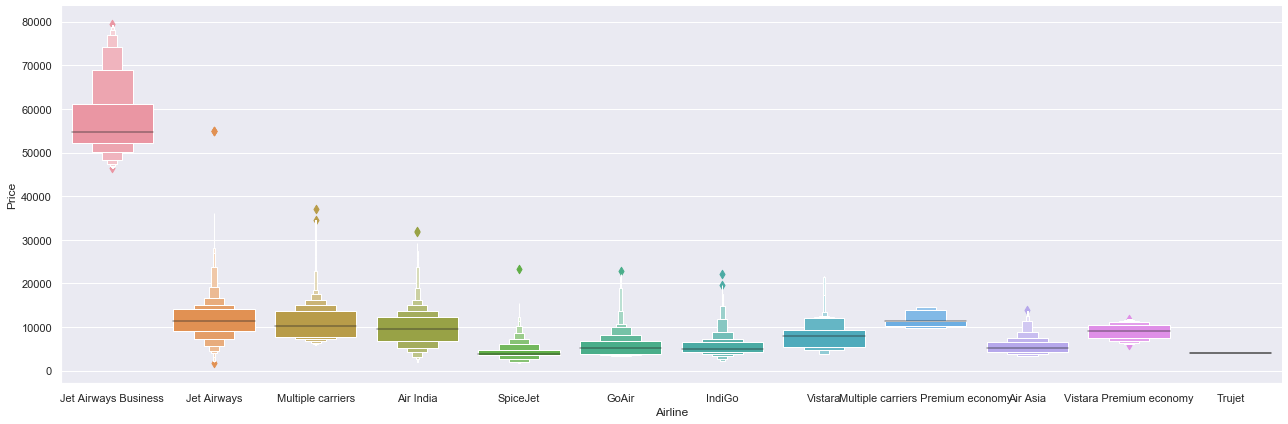

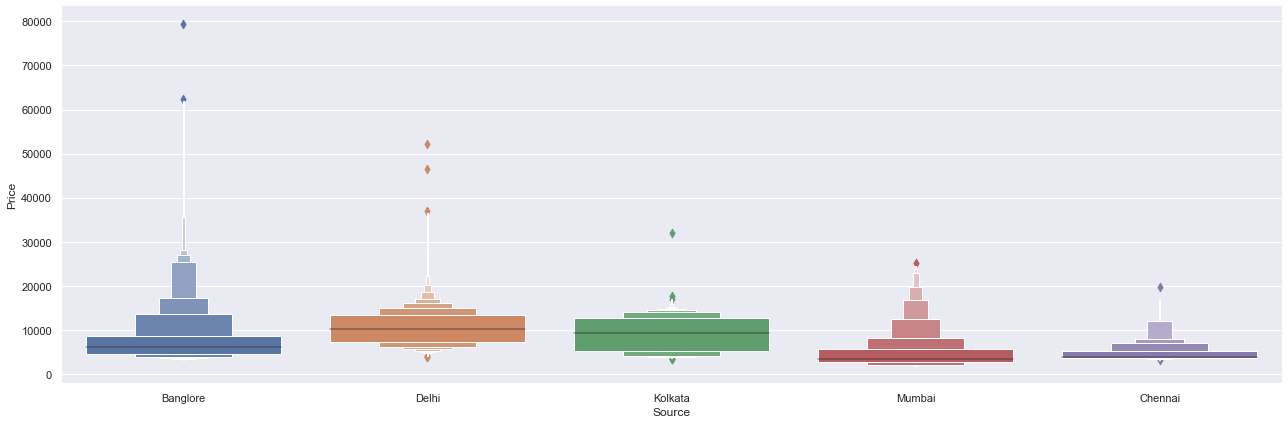

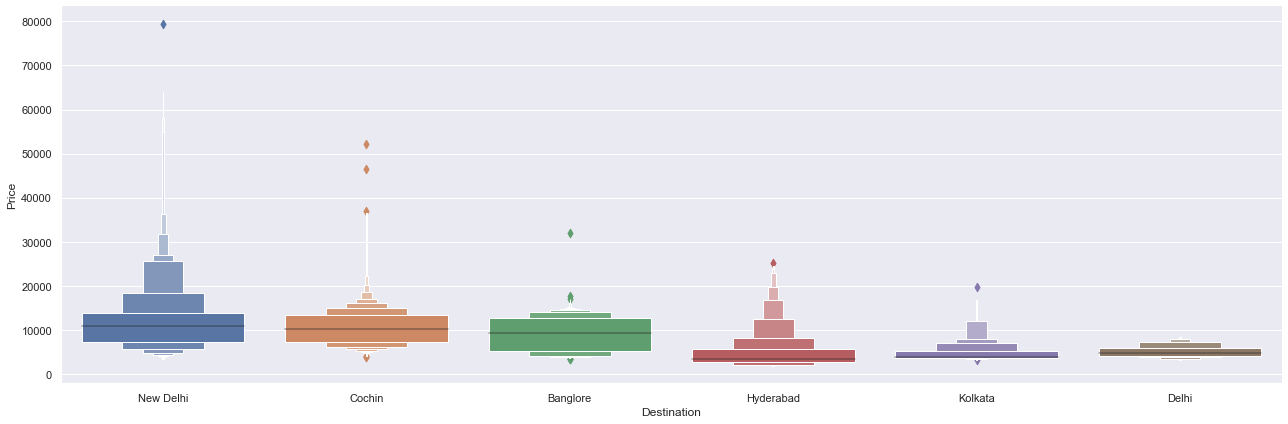

In [26]:
# let's check the impact of cat_features on Price

for feature in cat_feature:
    sns.catplot(y = "Price", x = feature, data = train_data.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
    plt.show()

In [27]:
# As all cat_features are Nominal Categorical data so we are creating dummy variables manually
for col in cat_feature:
    freqs=train_data[col].value_counts()
    k=freqs.index[freqs>1][:-1]
    for cat in k:
        name=col+'_'+cat
        train_data[name]=(train_data[col]==cat).astype(int)
    del train_data[col]
    print(col)
    

Airline
Source
Destination


In [28]:
train_data.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Jet Airways,Airline_IndiGo,Airline_Air India,Airline_Multiple carriers,Airline_SpiceJet,Airline_Vistara,Airline_Air Asia,Airline_GoAir,Airline_Multiple carriers Premium economy,Airline_Jet Airways Business,Source_Delhi,Source_Kolkata,Source_Banglore,Source_Mumbai,Destination_Cochin,Destination_Banglore,Destination_Delhi,Destination_New Delhi,Destination_Hyderabad
0,0,3897,24,3,22,20,1,10,2,50,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,2,7662,1,5,5,50,13,15,7,25,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [29]:
train_data.shape

(10682, 29)

---

## Test set

In [30]:
test_data = pd.read_excel("Test_set.xlsx")

In [31]:
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [32]:
# Preprocessing

print("Test data Info")
print("-"*75)
print(test_data.info())

print()
print()

print("Null values :")
print("-"*75)
test_data.dropna(inplace = True)
print(test_data.isnull().sum())

# EDA

# Date_of_Journey
test_data["Journey_day"] = pd.to_datetime(test_data.Date_of_Journey, format="%d/%m/%Y").dt.day
test_data["Journey_month"] = pd.to_datetime(test_data["Date_of_Journey"], format = "%d/%m/%Y").dt.month
test_data.drop(["Date_of_Journey"], axis = 1, inplace = True)

# Dep_Time
test_data["Dep_hour"] = pd.to_datetime(test_data["Dep_Time"]).dt.hour
test_data["Dep_min"] = pd.to_datetime(test_data["Dep_Time"]).dt.minute
test_data.drop(["Dep_Time"], axis = 1, inplace = True)

# Arrival_Time
test_data["Arrival_hour"] = pd.to_datetime(test_data.Arrival_Time).dt.hour
test_data["Arrival_min"] = pd.to_datetime(test_data.Arrival_Time).dt.minute
test_data.drop(["Arrival_Time"], axis = 1, inplace = True)

# Duration
duration = list(test_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

# Adding Duration column to test set
test_data["Duration_hours"] = duration_hours
test_data["Duration_mins"] = duration_mins
test_data.drop(["Duration"], axis = 1, inplace = True)


Test data Info
---------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
Airline            2671 non-null object
Date_of_Journey    2671 non-null object
Source             2671 non-null object
Destination        2671 non-null object
Route              2671 non-null object
Dep_Time           2671 non-null object
Arrival_Time       2671 non-null object
Duration           2671 non-null object
Total_Stops        2671 non-null object
Additional_Info    2671 non-null object
dtypes: object(10)
memory usage: 208.8+ KB
None


Null values :
---------------------------------------------------------------------------
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64


In [33]:

cat_features=list(test_data.select_dtypes(include=['object']).columns.values)
print(cat_features)

# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other
test_data.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

# Replacing Total_Stops
test_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

cat_feature=['Airline', 'Source', 'Destination']

# As all cat_features are Nominal Categorical data so we are creating dummy variables manually
for col in cat_feature:
    freqs=test_data[col].value_counts()
    k=freqs.index[freqs>2][:-1]
    for cat in k:
        name=col+'_'+cat
        test_data[name]=(test_data[col]==cat).astype(int)
    del test_data[col]
    print(col)
    

print()
print()

print("Shape of test data : ",test_data.shape)



['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']
Airline
Source
Destination


Shape of test data :  (2671, 26)


In [34]:
test_data.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Jet Airways,Airline_IndiGo,Airline_Air India,Airline_Multiple carriers,Airline_SpiceJet,Airline_Vistara,Airline_Air Asia,Airline_GoAir,Source_Delhi,Source_Kolkata,Source_Banglore,Source_Mumbai,Destination_Cochin,Destination_Banglore,Destination_Delhi,Destination_New Delhi,Destination_Hyderabad
0,1,6,6,17,30,4,25,10,55,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
1,1,12,5,6,20,10,20,4,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
2,1,21,5,19,15,19,0,23,45,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
3,1,21,5,8,0,21,0,13,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0
4,0,24,6,23,55,2,45,2,50,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0


---

## Feature Selection

Finding out the best feature which will contribute and have good relation with target variable.
Following are some of the feature selection methods,


1. <span style="color: purple;">**heatmap**</span>
2. <span style="color: purple;">**feature_importance_**</span>
3. <span style="color: purple;">**SelectKBest**</span>

In [35]:
train_data.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Jet Airways,Airline_IndiGo,Airline_Air India,Airline_Multiple carriers,Airline_SpiceJet,Airline_Vistara,Airline_Air Asia,Airline_GoAir,Airline_Multiple carriers Premium economy,Airline_Jet Airways Business,Source_Delhi,Source_Kolkata,Source_Banglore,Source_Mumbai,Destination_Cochin,Destination_Banglore,Destination_Delhi,Destination_New Delhi,Destination_Hyderabad
0,0,3897,24,3,22,20,1,10,2,50,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,2,7662,1,5,5,50,13,15,7,25,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [36]:
X = train_data.drop('Price',axis=1)
X

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Jet Airways,Airline_IndiGo,Airline_Air India,Airline_Multiple carriers,Airline_SpiceJet,Airline_Vistara,Airline_Air Asia,Airline_GoAir,Airline_Multiple carriers Premium economy,Airline_Jet Airways Business,Source_Delhi,Source_Kolkata,Source_Banglore,Source_Mumbai,Destination_Cochin,Destination_Banglore,Destination_Delhi,Destination_New Delhi,Destination_Hyderabad
0,0,24,3,22,20,1,10,2,50,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,2,1,5,5,50,13,15,7,25,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
2,2,9,6,9,25,4,25,19,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
3,1,12,5,18,5,23,30,5,25,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
4,1,1,3,16,50,21,35,4,45,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,9,4,19,55,22,25,2,30,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
10679,0,27,4,20,45,23,20,2,35,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
10680,0,27,4,8,20,11,20,3,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
10681,0,1,3,11,30,14,10,2,40,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0


In [37]:
y = train_data["Price"]
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

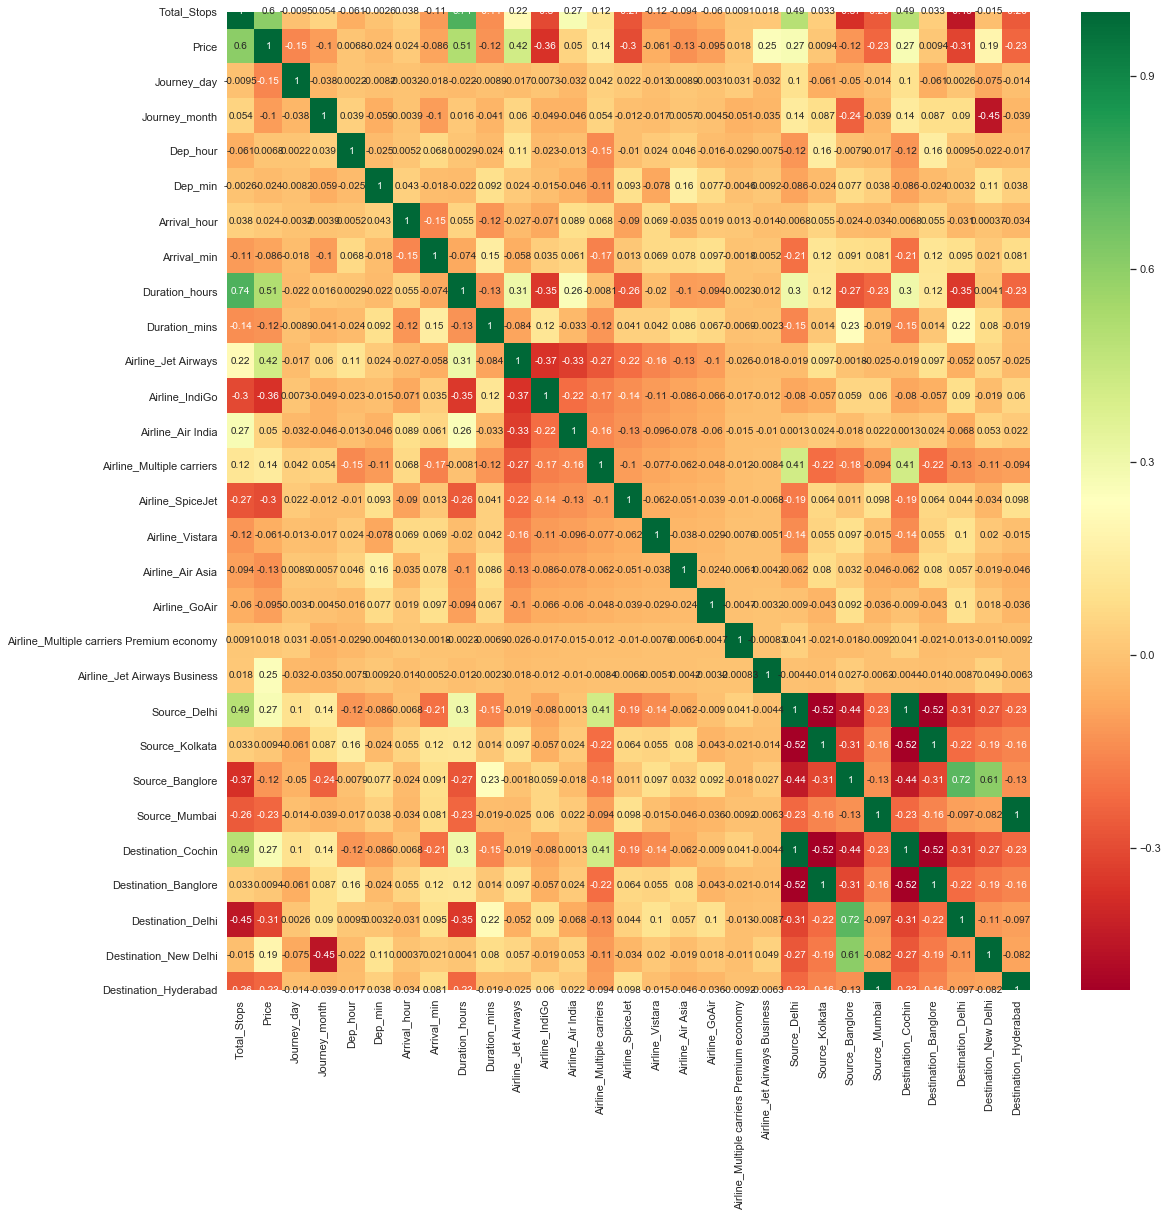

In [38]:
# Finds correlation between Independent and dependent attributes

plt.figure(figsize = (18,18))
sns.heatmap(train_data.corr(), annot = True, cmap = "RdYlGn")

plt.show()

In [39]:
# Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

C:\Users\skyas\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
                    max_features='auto', max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=1, min_samples_split=2,
                    min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                    oob_score=False, random_state=None, verbose=0,
                    warm_start=False)

In [40]:
print(selection.feature_importances_)

[0.1939907  0.1429986  0.05398892 0.02632292 0.02173905 0.02558246
 0.01825841 0.18082458 0.01846172 0.12557446 0.02077629 0.007851
 0.01763619 0.00322492 0.00470447 0.00237614 0.00130205 0.00068849
 0.06695821 0.00272381 0.00188485 0.00646645 0.00441437 0.00965528
 0.002323   0.01585872 0.01841077 0.00500316]


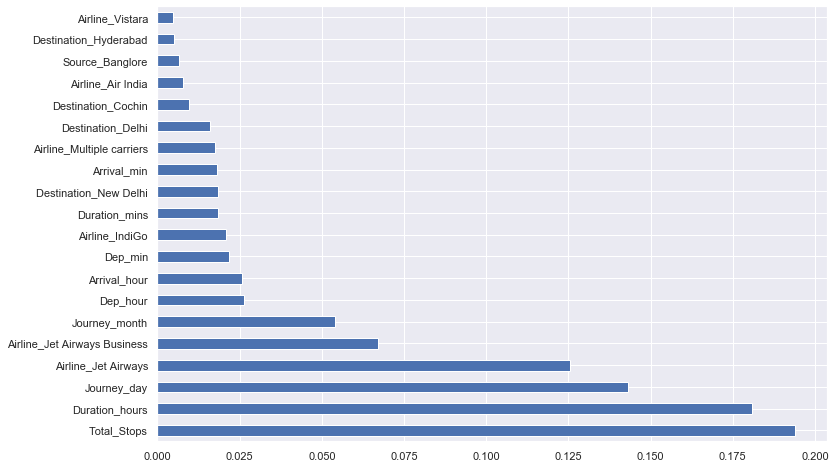

In [41]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()


---

## Fitting model using Random Forest

1. Split dataset into train and test set in order to prediction w.r.t X_test
2. If needed do scaling of data
    * Scaling is not done in Random forest
3. Import model
4. Fit the data
5. Predict w.r.t X_test
6. In regression check **RSME** Score
7. Plot graph

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [43]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

C:\Users\skyas\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [44]:
y_pred = reg_rf.predict(X_test)

In [45]:
reg_rf.score(X_train, y_train)

0.946217281029806

In [46]:
reg_rf.score(X_test, y_test)

0.7859948719184189

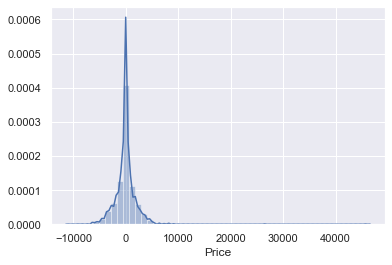

In [47]:
sns.distplot(y_test-y_pred)
plt.show()

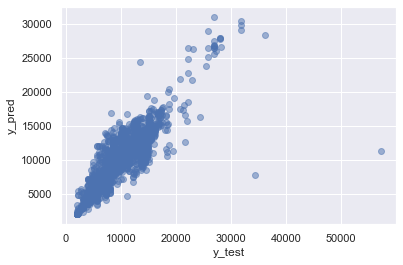

In [48]:

plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [49]:
from sklearn import metrics

In [50]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1218.0643387852724
MSE: 4614390.625354508
RMSE: 2148.1132710717347


In [51]:
# RMSE/(max(DV)-min(DV))

2090.5509/(max(y)-min(y))

0.026887077025966846

In [52]:
metrics.r2_score(y_test, y_pred)

0.7859948719184189

---

## Hyperparameter Tuning


* Choose following method for hyperparameter tuning
    1. **RandomizedSearchCV** --> Fast
    2. **GridSearchCV**
* Assign hyperparameters in form of dictionery
* Fit the model
* Check best paramters and best score

In [53]:
from sklearn.model_selection import RandomizedSearchCV

In [54]:
param_dist = {"n_estimators":[100,200,300,500,700,1000],
              "max_features": ['auto','sqrt'],
                'max_depth':[5,10,15,20,30,50,70],
                'min_samples_leaf':[1,2,5,10,15,20], 
                'min_samples_split':[2,5,10,15,20]
                  }

In [55]:
clf = RandomForestRegressor()

In [56]:
random_search = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=10,scoring='neg_mean_squared_error',cv=5,n_jobs=-1,random_state=100)
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_sta...


In [60]:
rf=random_search.best_estimator_

In [61]:
rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=50,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=2, min_samples_split=20,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [62]:
prediction = rf.predict(X_test)

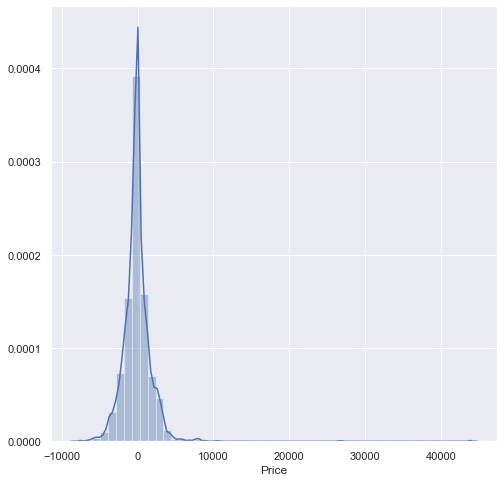

In [63]:
plt.figure(figsize = (8,8))
sns.distplot(y_test-prediction)
plt.show()

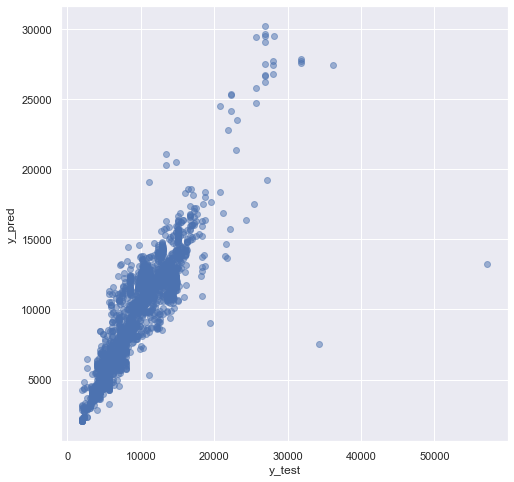

In [64]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [65]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 1184.1443846302498
MSE: 4051688.855336253
RMSE: 2012.8807354973253


---

## Save the model to reuse it again

In [66]:
import pickle
# open a file, where you ant to store the data
file = open('flight_rf.pkl', 'wb')

# dump information to that file
pickle.dump(rf, file)

In [67]:
model = open('flight_rf.pkl','rb')
forest = pickle.load(model)

In [68]:
y_prediction = rf.predict(X_test)

In [69]:
metrics.r2_score(y_test, y_prediction)

0.8120917228661511

---